In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
df = pd.read_csv("../../data/csv/Smarket.csv")
df.head()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,2001,0.381,-0.192,-2.624,-1.055,5.010,1.1913,0.959,Up
1,2001,0.959,0.381,-0.192,-2.624,-1.055,1.2965,1.032,Up
2,2001,1.032,0.959,0.381,-0.192,-2.624,1.4112,-0.623,Down
3,2001,-0.623,1.032,0.959,0.381,-0.192,1.2760,0.614,Up
4,2001,0.614,-0.623,1.032,0.959,0.381,1.2057,0.213,Up


### The Stock Market Data

In [3]:
df.columns.tolist()

['Year',
 'Lag1',
 'Lag2',
 'Lag3',
 'Lag4',
 'Lag5',
 'Volume',
 'Today',
 'Direction']

In [4]:
df.shape

(1250, 9)

In [5]:
df.describe()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
count,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.00000,1250.000000,1250.000000
mean,2003.016000,0.003834,0.003919,0.001716,0.001636,0.00561,1.478305,0.003138
std,1.409018,1.136299,1.136280,1.138703,1.138774,1.14755,0.360357,1.136334
min,2001.000000,-4.922000,-4.922000,-4.922000,-4.922000,-4.92200,0.356070,-4.922000
25%,2002.000000,-0.639500,-0.639500,-0.640000,-0.640000,-0.64000,1.257400,-0.639500
50%,2003.000000,0.039000,0.039000,0.038500,0.038500,0.03850,1.422950,0.038500
75%,2004.000000,0.596750,0.596750,0.596750,0.596750,0.59700,1.641675,0.596750
max,2005.000000,5.733000,5.733000,5.733000,5.733000,5.73300,3.152470,5.733000


In [6]:
df['Direction'].describe()

count     1250
unique       2
top         Up
freq       648
Name: Direction, dtype: object

In [7]:
# pairwise correlations
df.corr()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
Year,1.000000,0.029700,0.030596,0.033195,0.035689,0.029788,0.539006,0.030095
Lag1,0.029700,1.000000,-0.026294,-0.010803,-0.002986,-0.005675,0.040910,-0.026155
Lag2,0.030596,-0.026294,1.000000,-0.025897,-0.010854,-0.003558,-0.043383,-0.010250
Lag3,0.033195,-0.010803,-0.025897,1.000000,-0.024051,-0.018808,-0.041824,-0.002448
Lag4,0.035689,-0.002986,-0.010854,-0.024051,1.000000,-0.027084,-0.048414,-0.006900
Lag5,0.029788,-0.005675,-0.003558,-0.018808,-0.027084,1.000000,-0.022002,-0.034860
Volume,0.539006,0.040910,-0.043383,-0.041824,-0.048414,-0.022002,1.000000,0.014592
Today,0.030095,-0.026155,-0.010250,-0.002448,-0.006900,-0.034860,0.014592,1.000000


The correlations between the lag variables (previous days’) and today’s returns are close to zero.

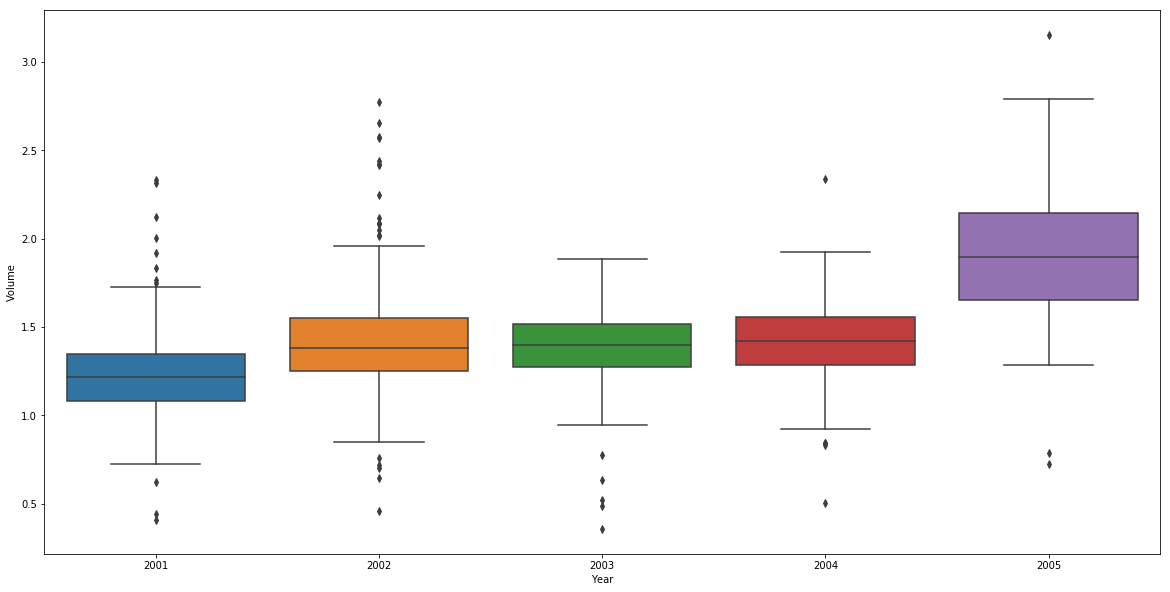

In [8]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 10)
sns.boxplot(x=df['Year'], y=df['Volume'])

The average number of shares traded daily increased from 2001 to 2005.

### Logistic Regression

(Logistic regression is applicable when Y is categorical.)

Predict Direction using Lag1 through Lag5 and Volume:

In [9]:
model = LogisticRegression()

In [10]:
x = df[['Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume']]
model.fit(X=x, y=df['Direction'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [11]:
print model.intercept_ 
print model.coef_
zip(x.columns.tolist(), model.coef_[0])

[-0.11454962]
[[-0.07279035 -0.04229102  0.010958    0.00921799  0.01023031  0.12793931]]


[('Lag1', -0.07279035244097605),
 ('Lag2', -0.042291015688171354),
 ('Lag3', 0.01095799639819893),
 ('Lag4', 0.00921799170450773),
 ('Lag5', 0.010230310971632023),
 ('Volume', 0.12793930878661286)]

In [12]:
ypred = model.predict(x)
ypred

array(['Up', 'Down', 'Down', ..., 'Up', 'Up', 'Up'], dtype=object)

In [13]:
confusion_matrix(df['Direction'], ypred, labels=["Down", "Up"])

array([[143, 459],
       [135, 513]])

In [14]:
# training set error
np.mean(df['Direction'] == ypred)  # (143.+513)/(143+459+135+513)

0.52480000000000004

In [15]:
print classification_report(df['Direction'], ypred)

             precision    recall  f1-score   support

       Down       0.51      0.24      0.33       602
         Up       0.53      0.79      0.63       648

avg / total       0.52      0.52      0.48      1250



* Recall = Sensitivity = True Positive Rate = $\frac{\mbox{# True Positive}}{\mbox{# True Positive + # False Negative}}$ = proportion of correctly identified positives  
1 = best value  
0 = worst value
* Precision = $\frac{\mbox{# True Positive}}{\mbox{# True Positive + # False Positive}}$   
1 = best value  
0 = worst value
* F1 score = (harmonic) mean of Precision and Recall = $2 \cdot \frac{\mbox{Precision} \cdot \mbox{Recall}}{\mbox{Precision} + \mbox{Recall}}$  
1 = best value  
0 = worst value
* Support = # of occurrences of each class in y_true